## Lettura del dataset

In [1]:
from pathlib import Path
import json
import pandas as pd

project_root = Path().resolve().parent
config_path = project_root / "config.json"
with open(config_path, "r") as f:
    config = json.load(f)

dataset_path = Path(config["dataset_path"])

# Se il percorso non è assoluto, lo combiniamo con la root del progetto
if not dataset_path.is_absolute():
    full_dataset_path = project_root / dataset_path
else:
    full_dataset_path = dataset_path

df = pd.read_csv(full_dataset_path)



In [2]:
import sys
from pathlib import Path
import importlib
# Path alla root del progetto (un livello sopra notebooks)
project_root = Path.cwd().parent

# Aggiungi la cartella src al Python path
sys.path.append(str(project_root / "src"))

import task1
importlib.reload(task1)
from task1 import *

## Visualizzazione delle colonne del dataset

In [3]:
# Mostra tutte le colonne
pd.set_option('display.max_columns', None)

# (Opzionale) mostra tutte le righe
pd.set_option('display.max_rows', None)

# (Opzionale) evita che il contenuto delle celle venga troncato
pd.set_option('display.max_colwidth', None)

df.head(5)
# print("Data di inizio: ",df["data"].min())
# print("Data di fine: ",df["data"].max())



,db_id,scontrino_id,puntovendita_id,data,cassa,cassiere,nummero_scontrino,ora,tessera,t_flag,num_riga,r_reparto_cdaplus,r_ean,r_qta_pezzi,r_peso,r_importo_lordo,r_imponibile,r_iva,r_sconto,r_sconto_fide,r_sconto_rip,r_tipo_riga,cod_prod,descr_prod,cat_mer,cod_forn,descr_forn,liv1,descr_liv1,liv2,descr_liv2,liv3,descr_liv3,liv4,descr_liv4,tipologia,descr_tipologia,cod_rep,descr_rep
0,sysevo,52597232,4542,2023-03-25,1,1,581,21:00,2.484252e+11,V,1,1,8006763007333,1,0.0,0.78,0.750000,4,0.47,0,0.10,NORMALE,1004624.0,1004624 ZAPPALA LATTE UHT P/S LT.1,1I23,868,00868 ZAPPALA' SPA *,1.0,DROGHERIA ALIMENTARE,118.0,LATTICINI UHT E ASSIMILABILI,11802.0,LATTE UHT,1180203.0,PARZIALMENTE SCREMATO,NO,Prodotti Normali,1.0,ALIMENTARE
1,sysevo,52597232,4542,2023-03-25,1,1,581,21:00,2.484252e+11,V,17,5,8003980090056,1,0.0,2.64,2.163934,22,0.35,0,0.35,NORMALE,1090781.0,1090781 CUKI TEGLIA EXTRA S97 8POR.X2,5442,4474,04474 CUKI COFRESCO S.R.L.,5.0,CURA CASA,504.0,USA E GETTA,50404.0,SACCHETTI/VASCHETTE ALIMENT,5040402.0,VASCHETTE,NO,Prodotti Normali,5.0,CURA CASA
2,sysevo,52597232,4542,2023-03-25,1,1,581,21:00,2.484252e+11,V,19,3,8001120932228,1,0.0,1.41,1.281818,10,0.18,0,0.18,NORMALE,3000305.0,3000305 TEST SFOGLIA RETT.S/O.PAL230G,3823,5447,05447 TEST PAM (CERELIA ITALIA S.R.L.),3.0,FRESCO,308.0,ALTRI PRODOTTI FRESCHI,30802.0,BASI,3080203.0,PASTA SFOGLIA,PM,Prodotti a Marchio Test,3.0,BANCO LIBERO SERVIZIO
3,sysevo,52597232,4542,2023-03-25,1,1,581,21:00,2.484252e+11,V,21,3,8001120932228,1,0.0,1.41,1.281818,10,0.18,0,0.18,NORMALE,3000305.0,3000305 TEST SFOGLIA RETT.S/O.PAL230G,3823,5447,05447 TEST PAM (CERELIA ITALIA S.R.L.),3.0,FRESCO,308.0,ALTRI PRODOTTI FRESCHI,30802.0,BASI,3080203.0,PASTA SFOGLIA,PM,Prodotti a Marchio Test,3.0,BANCO LIBERO SERVIZIO
4,sysevo,52597232,4542,2023-03-25,1,1,581,21:00,2.484252e+11,V,23,1,8001120856173,1,0.0,0.44,0.423077,4,1.55,0,0.06,NORMALE,3000397.0,3000397 *TEST P.U.GRAM.TEST N/ANT G500,1F61,5543,05543 TEST PAM (PASTIFICIO ANDALINI SPA),1.0,DROGHERIA ALIMENTARE,115.0,PASTA,11506.0,PASTA ALL'UOVO,1150601.0,BRODI/MINESTRINE,PM,Prodotti a Marchio Test,1.0,ALIMENTARE


## Visualizzazione degli istogrammi

Processing liv1 (descr_liv1) ...


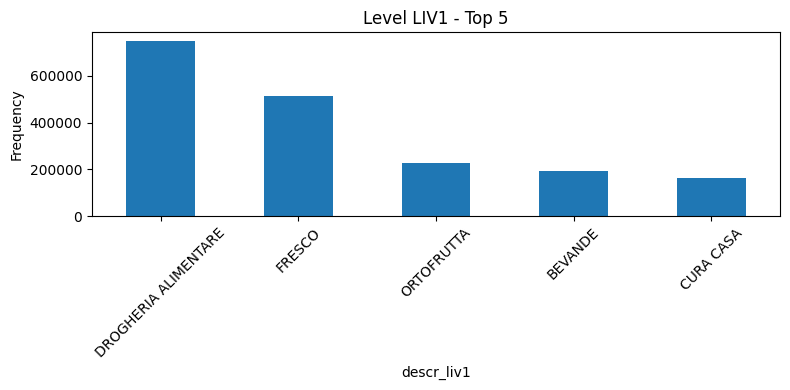

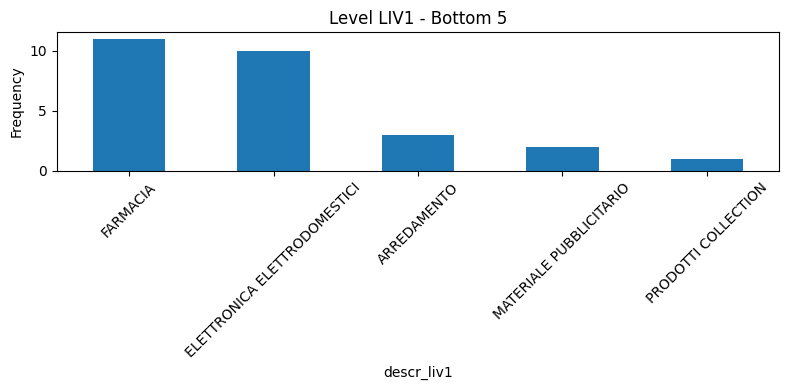

Processing liv2 (descr_liv2) ...


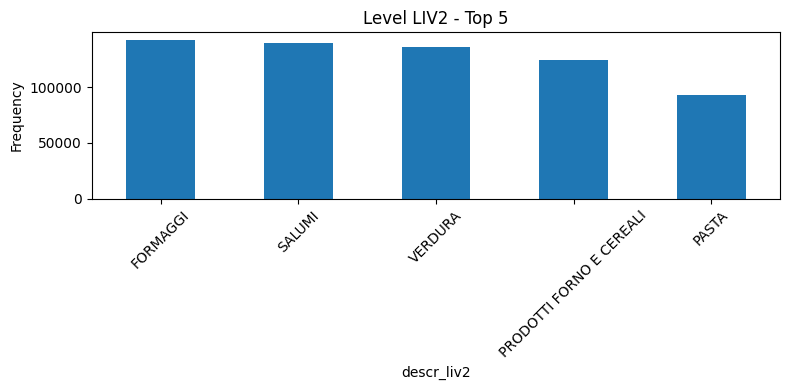

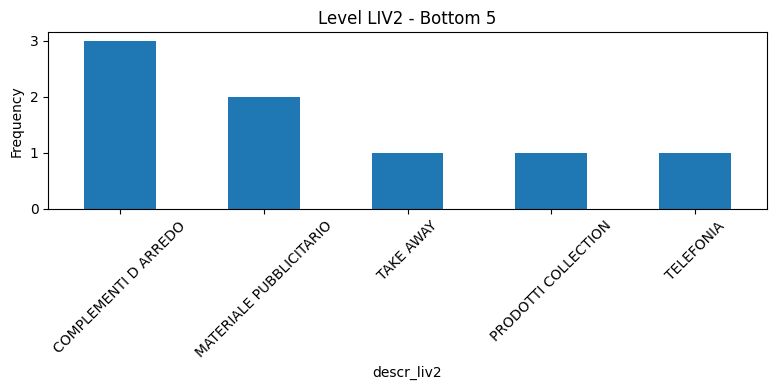

Processing liv3 (descr_liv3) ...


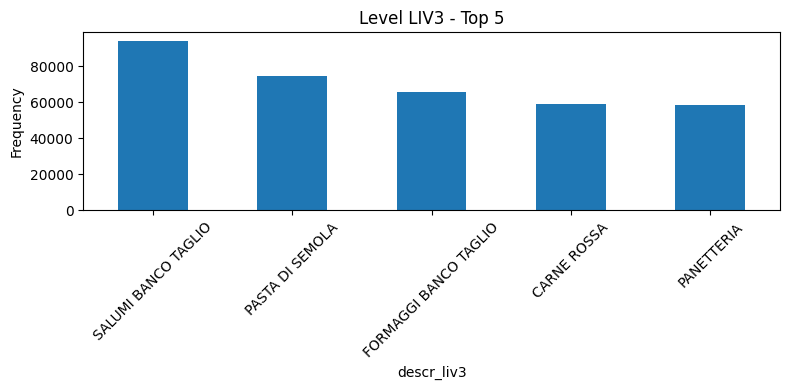

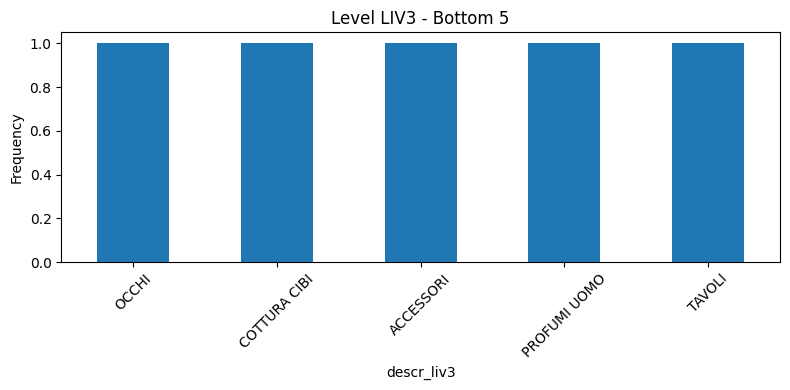

Processing liv4 (descr_liv4) ...


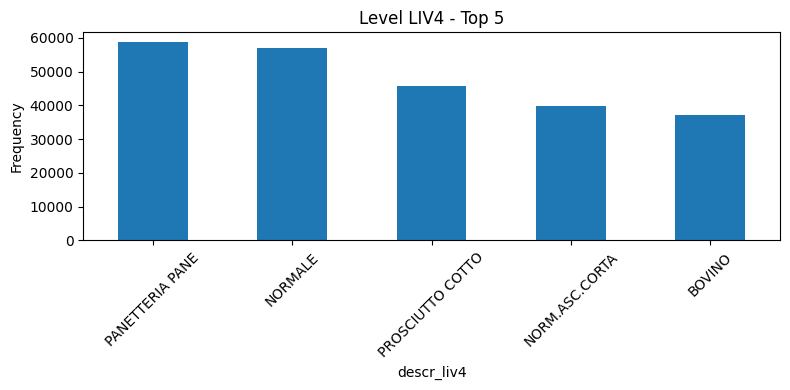

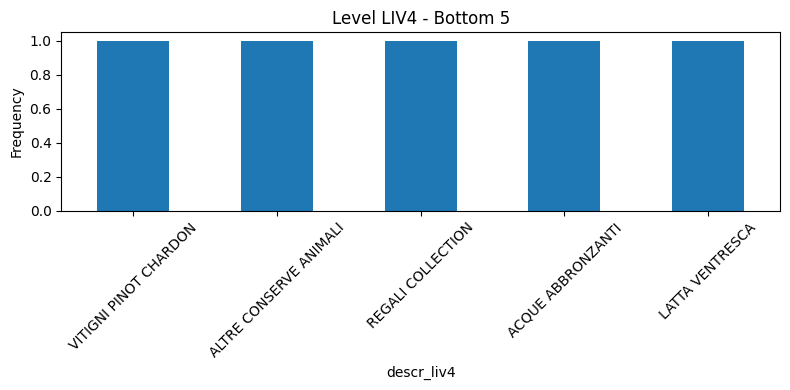

In [ ]:
import matplotlib.pyplot as plt

# ----- Exclude shoppers -----
df_clean = df[df["descr_liv4"] != "SHOPPERS"]

levels = {
    "liv1": "descr_liv1",
    "liv2": "descr_liv2",
    "liv3": "descr_liv3",
    "liv4": "descr_liv4"
}

def plot_frequency(df, col, title_prefix):
    freq = df[col].value_counts()

    # Top 5
    top5 = freq.head(5)
    plt.figure(figsize=(8,4))
    ax = top5.plot(kind="bar")
    ax.set_title(f"{title_prefix} - Top 5")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax.tick_params(axis='x', labelrotation=45)  # 0 = orizzontale

    plt.tight_layout()
    plt.show()

    # Bottom 5
    bottom5 = freq.tail(5)
    plt.figure(figsize=(8,4))
    ax = bottom5.plot(kind="bar")
    ax.set_title(f"{title_prefix} - Bottom 5")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

    ax.tick_params(axis='x', labelrotation=45)  

    plt.tight_layout()
    plt.show()


for level, desc_col in levels.items():
    plot_frequency(df_clean, desc_col, f"Level {level.upper()}")
